In [39]:
## Changing current working directory

In [20]:
import os
os.chdir(r'C:\Users\praka\OneDrive\Desktop\METRO\PYTHON_PROJECT\KRUTIKA_PROJECT')
os.getcwd()

'C:\\Users\\praka\\OneDrive\\Desktop\\METRO\\PYTHON_PROJECT\\KRUTIKA_PROJECT'

In [40]:
#import libraries

In [21]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [22]:
df= pd.read_csv('cinematicket.csv')


In [23]:
# counting missing values
df.apply(lambda x: sum(x.isnull()))

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [24]:
df.fillna(
            {
                'occu_perc': df.occu_perc.mean(),
                'capacity': df.capacity.mean()
            }, 
            inplace = True
            )
df

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


In [25]:
# iloc excludes 4 (compared to loc where it includes 4)
# iloc includes 0
X = df.iloc[:, 2:9]
X.head()

,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use
0,3900000,26,0,4,4.26,150000.0,26
1,3360000,42,0,5,8.08,80000.0,42
2,2560000,32,0,4,20.00,80000.0,32
3,1200000,12,0,1,11.01,100000.0,12
4,1200000,15,0,3,16.67,80000.0,15


In [26]:
y = df.cinema_code

In [27]:
X.head()

,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use
0,3900000,26,0,4,4.26,150000.0,26
1,3360000,42,0,5,8.08,80000.0,42
2,2560000,32,0,4,20.00,80000.0,32
3,1200000,12,0,1,11.01,100000.0,12
4,1200000,15,0,3,16.67,80000.0,15


In [28]:
type(X)

pandas.core.frame.DataFrame

y = kmeans.fit_predict(df[['Feat_1', 'Feat_2', 'Feat_3', 'Feat_4']])


In [29]:
#K-Means CLustering for segmenting cinemas

In [30]:
#Provided data doesn't include cinema details like demographic data, ownership, capacity and so on. 
#But based on sale history (+ feature engineering) we should have better practical segmentation of cinemas.
#for each cinema with unique id predict its cluster based on your clustering algorithm(s)

## Why PCA ?

In [31]:
#PCA is the technique to reduce the number of features in your dataset. These two algorithms can help because we can
#get a visualization in fewer dimensions, which will lead us to an interpretation to determine if the groups are 
#actually well-separated.It also scales down the data which is helpful in distance based algorithms.

## PCA

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

In [33]:
pca_2d
print(type(pca_2d))
X = pd.DataFrame(pca_2d, columns = ['A','B'])
X

<class 'numpy.ndarray'>


,A,B
0,-8.447255e+06,71260.675705
1,-8.987275e+06,1420.260574
2,-9.787275e+06,1656.585200
3,-1.114727e+07,22058.309633
4,-1.114728e+07,2058.337555
...,...,...
142519,-1.102728e+07,-17977.089507
142520,-1.114728e+07,2058.336542
142521,-1.128726e+07,54599.614025
142522,-1.174726e+07,42235.516113


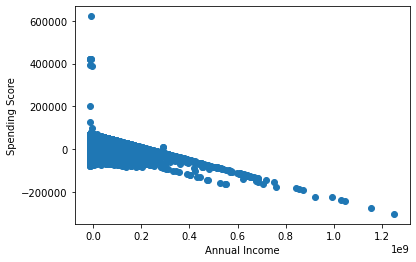

In [34]:
plt.scatter(X.iloc[:,0],X.iloc[:,1])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

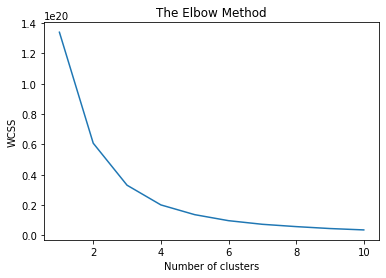

In [35]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
# Training the K-Means model on the dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
y_kmeans = kmeans.fit_predict(X)


In [37]:
X['clusters']=y_kmeans.tolist()

In [38]:
X.head()

,A,B,clusters
0,-8.447255e+06,71260.675705,0
1,-8.987275e+06,1420.260574,0
2,-9.787275e+06,1656.585200,0
3,-1.114727e+07,22058.309633,0
4,-1.114728e+07,2058.337555,0


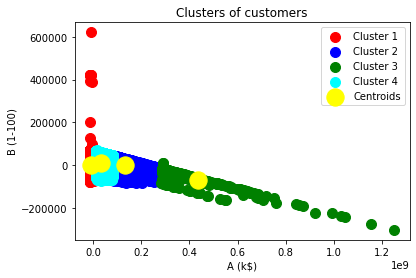

In [45]:
# Visualising the clusters
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X.iloc[y_kmeans == 4, 0], X.iloc[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('A (k$)')
plt.ylabel('B (1-100)')
plt.legend()
plt.show()

## CONCLUSION : 

In [ ]:
# Film code is segregated into 4 clusteres,  show time and total sales being the most impotant features which are 
#segregating the data. 
